In [1]:
import csv
from matplotlib import pyplot as plt
import numpy as np

reshape_size = (48,48)
def GetData(filename):
    X = []
    Y = []
    with open(filename) as csv_file:
        f = 0
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            if f == 0 :
                print(row)
                f = 1
            elif f == 1:
                pixels = np.fromstring(row[1], dtype=int, sep=' ')
                pixels = pixels.reshape( reshape_size )
                emotion = int(row[0])

                X.append(pixels)
                Y.append(emotion)
    return [X,Y]

In [2]:
[train_X, train_Y] = GetData('Train_Data.csv')
train_X = np.array(train_X)
train_Y = np.array(train_Y)

print('Train data shape:',train_X.shape, train_Y.shape)

['emotion', 'pixels']
Train data shape: (28709, 48, 48) (28709,)


In [3]:
[validation_X, validation_Y] = GetData('Validation_Data.csv')
validation_X = np.array(validation_X)
validation_Y = np.array(validation_Y)

print('Validation data shape:',validation_X.shape, validation_Y.shape)

['emotion', 'pixels']
Validation data shape: (3589, 48, 48) (3589,)


In [4]:
[test_X, test_Y] = GetData('Test_Data.csv')
test_X = np.array(test_X)
test_Y = np.array(test_Y)

print('Test data shape:',test_X.shape, test_Y.shape)

['emotion', 'pixels']
Test data shape: (3589, 48, 48) (3589,)


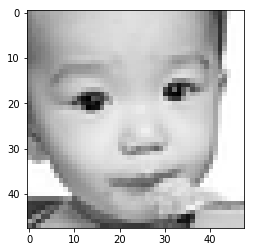

In [5]:

plt.figure(0)
plt.imshow(train_X[2000], cmap = 'gray')
plt.show()

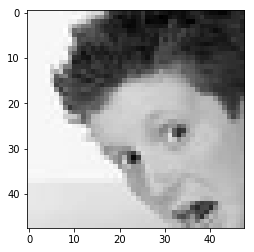

In [6]:
plt.figure(1)
plt.imshow(validation_X[20], cmap = 'gray')
plt.show()

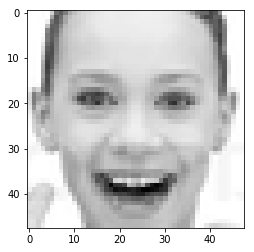

In [7]:
plt.figure(2)
plt.imshow(test_X[10], cmap = 'gray')
plt.show()

In [8]:
def ChangeTo4D(data):
    ip_shape = data.shape
    ip_shape += (1,)

    data_4d = np.zeros(ip_shape)
    data_4d[..., 0] = data

    print(data_4d.shape)
    print(data_4d[0].shape)
    return data_4d

In [9]:
train_X_4d = ChangeTo4D(train_X)
validation_X_4d = ChangeTo4D(validation_X)
test_X_4d = ChangeTo4D(test_X)

(28709, 48, 48, 1)
(48, 48, 1)
(3589, 48, 48, 1)
(48, 48, 1)
(3589, 48, 48, 1)
(48, 48, 1)


In [11]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [12]:
test_Y_one_hot_encoding = keras.utils.to_categorical(test_Y);
train_Y_one_hot_encoding = keras.utils.to_categorical(train_Y);
validation_Y_one_hot_encoding = keras.utils.to_categorical(validation_Y);

In [13]:

temp_data = train_X_4d[:200]
print(temp_data.shape)

(200, 48, 48, 1)
